<a href="https://colab.research.google.com/github/TuanNguyenDin/Ecommerce-customer-behavior/blob/main/ecommerce_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import kagglehub
from kagglehub import KaggleDatasetAdapter
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc

## What question(s) are you trying to answer?

- Do certain age groups, genders, countries, or cities have higher or lower churn rates?
- How do membership duration and login frequency correlate with customer churn? Are long-term members less likely to churn?
- Do metrics like average session duration, pages per session, cart abandonment rate, and wishlist items indicate a higher propensity to churn?
- Is there a relationship between email open rates, customer service calls, product reviews, and social media engagement scores with churn?
- How do total purchases, average order value, days since last purchase, discount usage, returns rate, payment method diversity, lifetime value, and credit balance influence churn?
- Does mobile app usage play a role in customer retention or churn?
- Can we build a predictive model to identify customers at high risk of churning based on their behavioral and demographic data?

## What are the expected outcomes?

From this dataset, we can anticipate several key outcomes:

- Identification of Key Churn Drivers: We expect to pinpoint specific demographic, behavioral, and transactional factors that strongly correlate with customer churn. This includes understanding how age, gender, country, login frequency, session duration, purchase history, and engagement metrics influence whether a customer churns.
- Customer Segmentation: We should be able to identify distinct customer segments with varying churn probabilities. For instance, certain age groups or customers from specific regions might exhibit different churn behaviors.
- Behavioral Patterns Leading to Churn: Insights into specific actions or lack thereof that precede churn.
- Impact of Customer Service and Engagement: We can analyze the role of customer service interactions, product reviews, and social media engagement in customer retention.
- Ultimately, the analysis should lead to concrete, data-driven recommendations for improving customer retention strategies, such as targeted marketing campaigns, product improvements, or enhanced customer support.

## Dataset Overview

The dataset used in this project is sourced from Kaggle, titled "E-commerce Customer Behavior Dataset." It contains various attributes related to customer interactions and characteristics within an e-commerce platform. The goal is to identify patterns, understand customer churn, and derive actionable insights.

### Key Features:
- **Demographic Information:** Age, Gender, Country, City.
- **Membership Details:** Membership Years, Login Frequency.
- **Website Interaction:** Session Duration (Avg), Pages Per Session, Cart Abandonment Rate, Wishlist Items.
- **Engagement & Communication:** Email Open Rate, Customer Service Calls, Product Reviews Written, Social Media Engagement Score.
- **Transactional Information:** Total Purchases, Payment Method Diversity, Lifetime Value, Credit Balance.
- **Mobile App Usage:** Mobile App Usage.
- **Churn Status:** A binary indicator (`Churned`) representing whether a customer has churned.
- **Signup Details:** Signup Quarter.

The dataset provides a rich foundation for exploring customer segmentation, predicting churn, and optimizing marketing strategies.

In [2]:
ecommerce_df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "dhairyajeetsingh/ecommerce-customer-behavior-dataset",
  "ecommerce_customer_churn_dataset.csv"
)
ecommerce_df.head(5)

/tmp/ipython-input-2587598351.py:1: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  ecommerce_df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'ecommerce-customer-behavior-dataset' dataset.


,Age,Gender,Country,City,Membership_Years,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Cart_Abandonment_Rate,Wishlist_Items,...,Email_Open_Rate,Customer_Service_Calls,Product_Reviews_Written,Social_Media_Engagement_Score,Mobile_App_Usage,Payment_Method_Diversity,Lifetime_Value,Credit_Balance,Churned,Signup_Quarter
0,43.0,Male,France,Marseille,2.9,14.0,27.4,6.0,50.6,3.0,...,17.9,9.0,4.0,16.3,20.8,1.0,953.33,2278.0,0,Q1
1,36.0,Male,UK,Manchester,1.6,15.0,42.7,10.3,37.7,1.0,...,42.8,7.0,3.0,NaN,23.3,3.0,1067.47,3028.0,0,Q4
2,45.0,Female,Canada,Vancouver,2.9,10.0,24.8,1.6,70.9,1.0,...,0.0,4.0,1.0,NaN,8.8,NaN,1289.75,2317.0,0,Q4
3,56.0,Female,USA,New York,2.6,10.0,38.4,14.8,41.7,9.0,...,41.4,2.0,5.0,85.9,31.0,3.0,2340.92,2674.0,0,Q1
4,35.0,Male,India,Delhi,3.1,29.0,51.4,NaN,19.1,9.0,...,37.9,1.0,11.0,83.0,50.4,4.0,3041.29,5354.0,0,Q4


In [3]:
ecommerce_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            47505 non-null  float64
 1   Gender                         50000 non-null  object 
 2   Country                        50000 non-null  object 
 3   City                           50000 non-null  object 
 4   Membership_Years               50000 non-null  float64
 5   Login_Frequency                50000 non-null  float64
 6   Session_Duration_Avg           46601 non-null  float64
 7   Pages_Per_Session              47000 non-null  float64
 8   Cart_Abandonment_Rate          50000 non-null  float64
 9   Wishlist_Items                 46000 non-null  float64
 10  Total_Purchases                50000 non-null  float64
 11  Average_Order_Value            50000 non-null  float64
 12  Days_Since_Last_Purchase       47000 non-null 

### Clean Data: Convert Object to String and Handle Missing Values

First, I'll convert `object` type columns to `string` type to ensure consistent data types across categorical features. Then, I'll address missing values in numerical columns by imputing them with the median of their respective columns. Using the median is generally a good approach as it is less sensitive to outliers compared to the mean.

In [4]:
# Convert object columns to string type
for col in ecommerce_df.select_dtypes(include='object').columns:
    ecommerce_df[col] = ecommerce_df[col].astype('string')

print("Object columns converted to string type.")

Object columns converted to string type.


In [5]:
# Fill missing numerical values with the median
numerical_cols_with_na = ecommerce_df.select_dtypes(include=['float64', 'int64']).columns[ecommerce_df.select_dtypes(include=['float64', 'int64']).isnull().any()].tolist()

for col in numerical_cols_with_na:
    median_val = ecommerce_df[col].median()
    ecommerce_df[col].fillna(median_val, inplace=True)
    print(f"Filled missing values in '{col}' with median: {median_val}")

Filled missing values in 'Age' with median: 38.0
Filled missing values in 'Session_Duration_Avg' with median: 26.8
Filled missing values in 'Pages_Per_Session' with median: 8.4
Filled missing values in 'Wishlist_Items' with median: 4.0
Filled missing values in 'Days_Since_Last_Purchase' with median: 21.0
Filled missing values in 'Discount_Usage_Rate' with median: 40.2
Filled missing values in 'Returns_Rate' with median: 5.4
Filled missing values in 'Email_Open_Rate' with median: 19.7
Filled missing values in 'Customer_Service_Calls' with median: 5.0
Filled missing values in 'Product_Reviews_Written' with median: 2.0
Filled missing values in 'Social_Media_Engagement_Score' with median: 27.6
Filled missing values in 'Mobile_App_Usage' with median: 18.6
Filled missing values in 'Payment_Method_Diversity' with median: 2.0
Filled missing values in 'Credit_Balance' with median: 1896.0


/tmp/ipython-input-3117960895.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ecommerce_df[col].fillna(median_val, inplace=True)


In [6]:
# Display info after cleaning to confirm data types and no missing values
ecommerce_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            50000 non-null  float64
 1   Gender                         50000 non-null  string 
 2   Country                        50000 non-null  string 
 3   City                           50000 non-null  string 
 4   Membership_Years               50000 non-null  float64
 5   Login_Frequency                50000 non-null  float64
 6   Session_Duration_Avg           50000 non-null  float64
 7   Pages_Per_Session              50000 non-null  float64
 8   Cart_Abandonment_Rate          50000 non-null  float64
 9   Wishlist_Items                 50000 non-null  float64
 10  Total_Purchases                50000 non-null  float64
 11  Average_Order_Value            50000 non-null  float64
 12  Days_Since_Last_Purchase       50000 non-null 

-------------------------

## Calculate Correlations with Churn




To identify numerical features that correlate with churn, I will select all numerical columns from the DataFrame, calculate their Pearson correlation with the 'Churned' column, and then sort them by absolute value in descending order.



In [7]:
numerical_cols = ecommerce_df.select_dtypes(include=['float64', 'int64']).columns
correlation_with_churn = ecommerce_df[numerical_cols].corrwith(ecommerce_df['Churned'], method='pearson')

# Sort by absolute value in descending order
correlation_with_churn_sorted = correlation_with_churn.reindex(correlation_with_churn.abs().sort_values(ascending=False).index)

print("Pearson Correlation with 'Churned' (sorted by absolute value):")
correlation_with_churn_sorted

Pearson Correlation with 'Churned' (sorted by absolute value):


,0
Churned,1.000000
Customer_Service_Calls,0.290384
Cart_Abandonment_Rate,0.277963
Pages_Per_Session,-0.224708
Session_Duration_Avg,-0.219512
Email_Open_Rate,-0.216233
Mobile_App_Usage,-0.211376
Login_Frequency,-0.204379
Wishlist_Items,-0.189569
Social_Media_Engagement_Score,-0.179829


The individual correlations with churn are calculated, I need to generate a full correlation matrix including all relevant numerical columns and 'Churned' to prepare for visualization.



In [8]:
relevant_cols = correlation_with_churn_sorted.index.tolist()
correlation_matrix = ecommerce_df[relevant_cols].corr(method='pearson')

print("Correlation Matrix:")
correlation_matrix.head()

Correlation Matrix:


,Churned,Customer_Service_Calls,Cart_Abandonment_Rate,Pages_Per_Session,Session_Duration_Avg,Email_Open_Rate,Mobile_App_Usage,Login_Frequency,Wishlist_Items,Social_Media_Engagement_Score,...,Total_Purchases,Days_Since_Last_Purchase,Credit_Balance,Age,Discount_Usage_Rate,Returns_Rate,Average_Order_Value,Lifetime_Value,Payment_Method_Diversity,Membership_Years
Churned,1.000000,0.290384,0.277963,-0.224708,-0.219512,-0.216233,-0.211376,-0.204379,-0.189569,-0.179829,...,-0.160029,0.148015,-0.147990,-0.100511,-0.074152,0.051122,0.042288,-0.010684,0.004767,-0.000623
Customer_Service_Calls,0.290384,1.000000,0.369062,-0.387198,-0.403278,-0.342611,-0.376689,-0.372568,-0.336641,-0.326673,...,-0.344430,-0.004774,-0.278550,0.001825,0.002767,0.002375,-0.000861,-0.294530,0.002875,-0.005245
Cart_Abandonment_Rate,0.277963,0.369062,1.000000,-0.648117,-0.677323,-0.576144,-0.635456,-0.624929,-0.570538,-0.543365,...,-0.576277,-0.004515,-0.469764,0.000089,-0.000759,-0.001298,-0.004015,-0.495295,0.000941,-0.000698
Pages_Per_Session,-0.224708,-0.387198,-0.648117,1.000000,0.714086,0.607967,0.665697,0.654605,0.596167,0.569395,...,0.606554,0.001444,0.495290,0.001133,0.000573,0.000372,0.007157,0.515333,-0.001193,0.003577
Session_Duration_Avg,-0.219512,-0.403278,-0.677323,0.714086,1.000000,0.641172,0.698572,0.685319,0.628219,0.600677,...,0.639808,-0.000266,0.518605,-0.001409,0.003006,0.002513,0.001875,0.541683,0.000825,0.006805


To visualize the correlation matrix, I will create a heatmap using `seaborn.heatmap`. This will provide a clear visual representation of the relationships between all numerical features and 'Churned'.



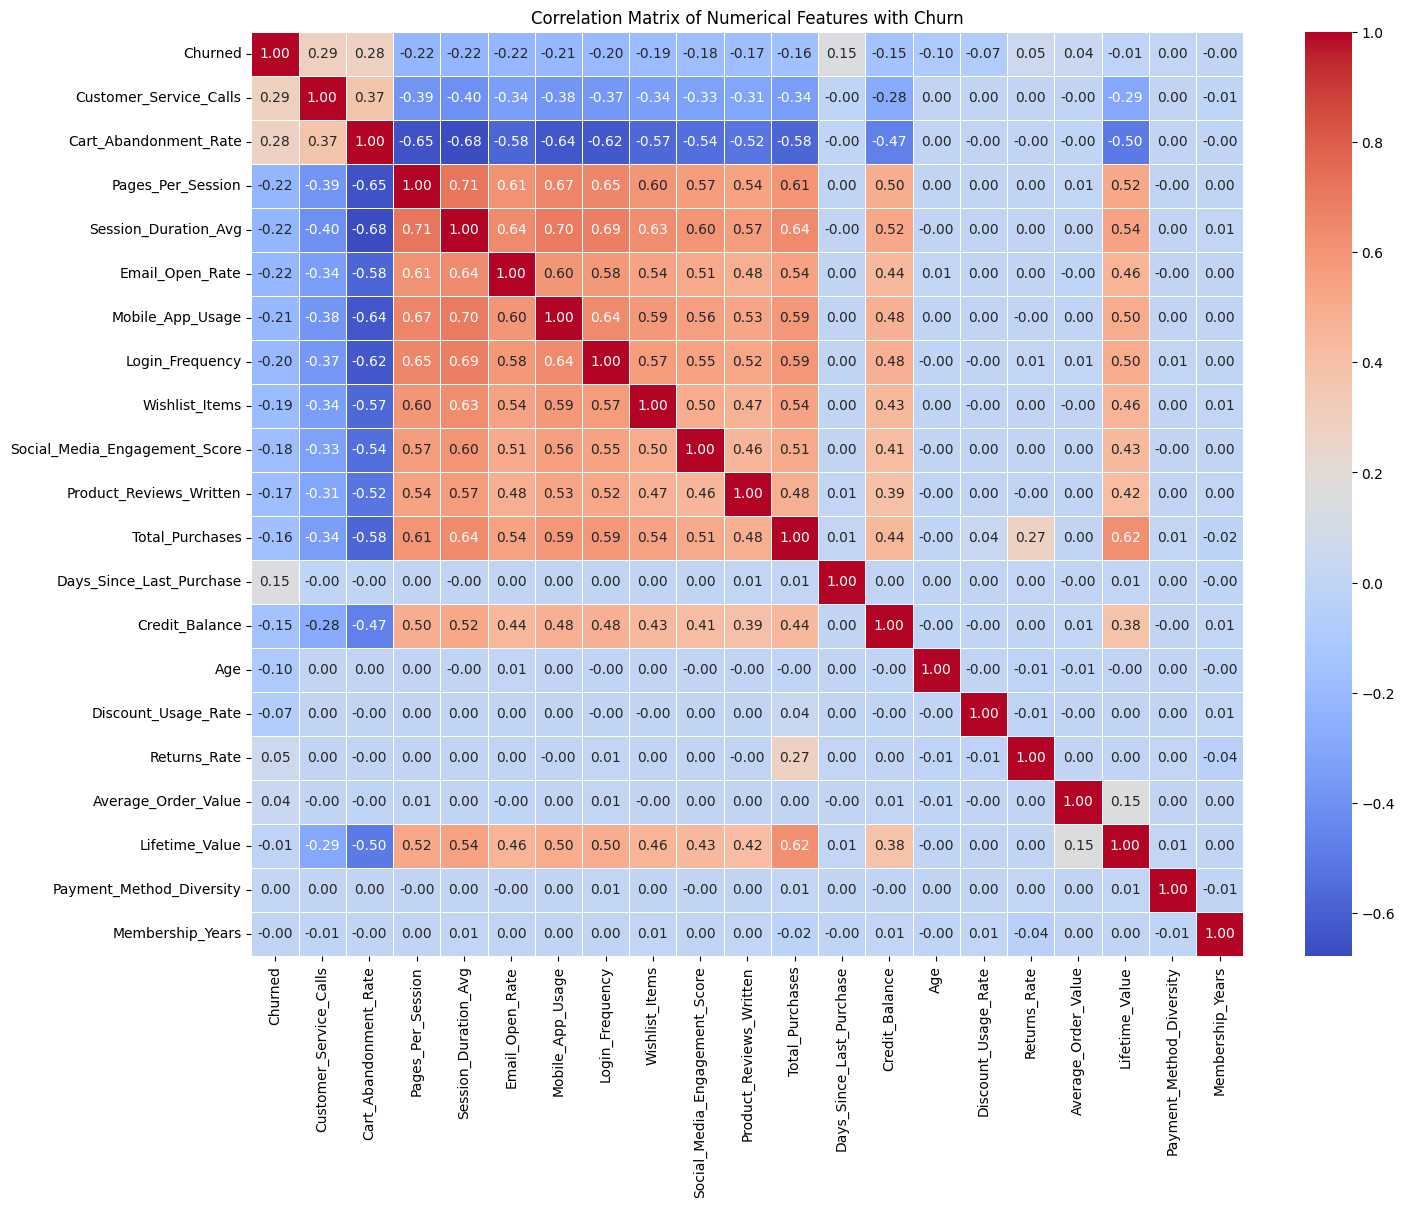

In [9]:
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features with Churn')
plt.show()

### Summary of Correlations between Numerical Attributes and Churn

The heatmap of the correlation matrix reveals several key relationships between numerical features and customer churn:

**Strong Positive Correlations with Churn (Factors that increase churn likelihood):**

*   **Customer_Service_Calls (0.29):** There is a moderate positive correlation between the number of customer service calls and churn. This suggests that customers who make more service calls are more likely to churn, possibly indicating unresolved issues or dissatisfaction.
*   **Cart_Abandonment_Rate (0.28):** A moderate positive correlation exists with the cart abandonment rate, implying that customers who frequently abandon their carts have a higher propensity to churn.
*   **Days_Since_Last_Purchase (0.15):** A weaker but still notable positive correlation indicates that as the time since the last purchase increases, so does the likelihood of churn. This highlights the importance of recent activity in retention.

**Strong Negative Correlations with Churn (Factors that decrease churn likelihood):**

*   **Pages_Per_Session (-0.22) & Session_Duration_Avg (-0.22):** Both pages per session and average session duration show a moderate negative correlation with churn. Customers who spend more time on the site and view more pages are less likely to churn, suggesting higher engagement leads to retention.
*   **Email_Open_Rate (-0.22):** A moderate negative correlation suggests that customers with higher email open rates are less likely to churn, indicating effective communication and engagement through email can help retention.
*   **Mobile_App_Usage (-0.21) & Login_Frequency (-0.20):** These metrics also show moderate negative correlations. Higher mobile app usage and more frequent logins are associated with lower churn rates, emphasizing the role of platform engagement.
*   **Wishlist_Items (-0.19), Social_Media_Engagement_Score (-0.18), Product_Reviews_Written (-0.17), Total_Purchases (-0.16), Credit_Balance (-0.15):** These features have weak to moderate negative correlations with churn. Generally, customers who engage more with the platform (wishlist, social media, reviews), make more purchases, or have a higher credit balance are less likely to churn.

**Weak or Negligible Correlations with Churn:**

*   **Age (-0.10):** While 'Age' was significant in the categorical analysis, its linear correlation with 'Churned' is weak, suggesting that the relationship might not be strictly linear or is more complex when interacting with other factors.
*   **Discount_Usage_Rate (-0.07), Returns_Rate (0.05), Average_Order_Value (0.04), Lifetime_Value (-0.01), Payment_Method_Diversity (0.00), Membership_Years (-0.00):** These features show very weak or negligible linear correlations with churn. This implies that these factors, by themselves, are not strong linear predictors of churn within this dataset.

### Data Analysis Key Findings
*   **Strong Positive Correlations with Churn:**
    *   **Customer Service Calls (0.29):** A moderate positive correlation indicates that more customer service calls are associated with a higher likelihood of churn, potentially signifying unresolved issues.
    *   **Cart Abandonment Rate (0.28):** A moderate positive correlation suggests that customers with higher cart abandonment rates are more prone to churning.
    *   **Days Since Last Purchase (0.15):** A weaker but notable positive correlation shows that an increasing time since the last purchase corresponds to a higher churn probability.
*   **Strong Negative Correlations with Churn:**
    *   **Engagement Metrics (Pages Per Session (-0.22) & Session Duration Avg (-0.22)):** Both metrics show a moderate negative correlation, implying that higher engagement (more pages viewed, longer session durations) leads to lower churn.
    *   **Email Open Rate (-0.22):** A moderate negative correlation suggests that customers with higher email open rates are less likely to churn, indicating effective communication helps retention.
    *   **Platform Usage (Mobile App Usage (-0.21) & Login Frequency (-0.20)):** Moderate negative correlations highlight that increased mobile app usage and more frequent logins are linked to lower churn rates.
    *   **Other Engagement/Value Metrics:** `Wishlist_Items` (-0.19), `Social_Media_Engagement_Score` (-0.18), `Product_Reviews_Written` (-0.17), `Total_Purchases` (-0.16), and `Credit_Balance` (-0.15) all show weak to moderate negative correlations, suggesting that higher engagement, purchasing activity, and credit balance reduce churn.
*   **Weak or Negligible Correlations with Churn:**
    *   Features like `Age` (-0.10), `Discount_Usage_Rate` (-0.07), `Returns_Rate` (0.05), `Average_Order_Value` (0.04), `Lifetime_Value` (-0.01), `Payment_Method_Diversity` (0.00), and `Membership_Years` (-0.00) exhibited very weak linear relationships with churn, implying they are not strong linear predictors in this dataset.


----------------

## Build a predictive model


In [10]:
from sklearn.preprocessing import StandardScaler

# Separate target variable 'Churned'
target = ecommerce_df['Churned']
features_df = ecommerce_df.drop(columns=['Churned'])

# Identify categorical and numerical columns
categorical_cols = features_df.select_dtypes(include='string').columns
numerical_cols = features_df.select_dtypes(include=['float64', 'int64']).columns

# Apply one-hot encoding to categorical columns
features_encoded = pd.get_dummies(features_df, columns=categorical_cols, drop_first=True)

# Initialize and apply StandardScaler to numerical columns
scaler = StandardScaler()
features_encoded[numerical_cols] = scaler.fit_transform(features_encoded[numerical_cols])

# Combine processed features with the target variable
processed_df = pd.concat([features_encoded, target], axis=1)

print("Data preparation complete. Displaying the first 5 rows of the processed DataFrame:")
processed_df.head()

Data preparation complete. Displaying the first 5 rows of the processed DataFrame:


,Age,Membership_Years,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Cart_Abandonment_Rate,Wishlist_Items,Total_Purchases,Average_Order_Value,Days_Since_Last_Purchase,...,City_Sydney,City_Tokyo,City_Toronto,City_Toulouse,City_Vancouver,City_Yokohama,Signup_Quarter_Q2,Signup_Quarter_Q3,Signup_Quarter_Q4,Churned
0,0.449670,-0.040799,0.304118,-0.019266,-0.741695,-0.397970,-0.416436,-0.585925,-0.161746,0.164025,...,False,False,False,False,False,False,False,False,False,0
1,-0.157149,-0.672148,0.432150,1.438275,0.431898,-1.190229,-1.069915,0.910390,-0.231633,1.445821,...,False,False,False,False,False,False,False,False,True,0
2,0.623047,-0.040799,-0.208008,-0.266953,-1.942582,0.848763,-1.069915,-0.571674,0.241517,-0.632767,...,False,False,False,False,True,False,False,False,True,0
3,1.576619,-0.186495,-0.208008,1.028639,1.660078,-0.944567,1.544001,0.269112,0.137911,0.614385,...,False,False,False,False,False,False,False,False,False,0
4,-0.243837,0.056331,2.224591,2.267073,-0.086666,-2.332555,1.544001,2.762969,0.103565,1.515107,...,False,False,False,False,False,False,False,False,True,0


In [11]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y) from the processed DataFrame
X = processed_df.drop('Churned', axis=1)
y = processed_df['Churned']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Data split into training and testing sets:")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


Data split into training and testing sets:
X_train shape: (40000, 71)
X_test shape: (10000, 71)
y_train shape: (40000,)
y_test shape: (10000,)


## Training Predictive Models

Use Logistic Regression as specified and fit it to the `X_train` and `y_train` sets.

In [12]:
from sklearn.linear_model import LogisticRegression

# Instantiate Logistic Regression model
model = LogisticRegression(random_state=42, solver='liblinear') # Using 'liblinear' solver for better convergence on smaller datasets or when L1/L2 regularization is applied.

# Train the model
model.fit(X_train, y_train)

print("Logistic Regression model trained successfully.")

Logistic Regression model trained successfully.


Now that the Logistic Regression model has been trained, the next step is to evaluate its performance on the test data. I use the trained model to make predictions on the `X_test` dataset.

In [13]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

print("Model predictions generated on the test set.")

Model predictions generated on the test set.


Calculate key classification metrics such as accuracy, precision, and recall, and then visualize the results using a confusion matrix and ROC curve to understand its predictive capabilities.

Model Accuracy: 0.7756
Model Precision: 0.6788
Model Recall: 0.4242
Model F1-Score: 0.5221


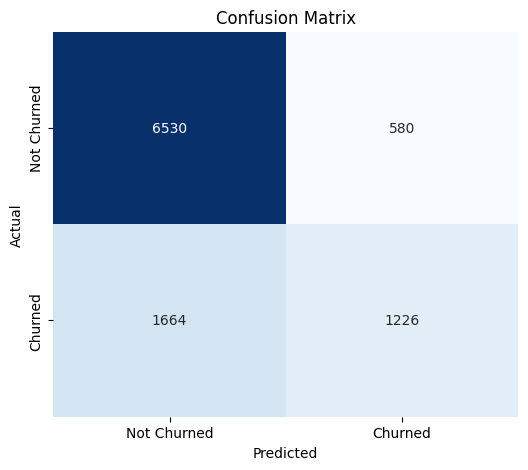

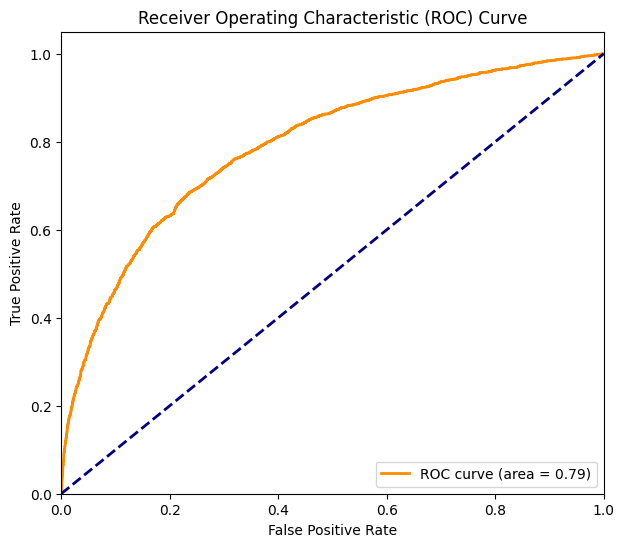

In [14]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.4f}")
print(f"Model Precision: {precision:.4f}")
print(f"Model Recall: {recall:.4f}")
print(f"Model F1-Score: {f1:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Churned', 'Churned'], yticklabels=['Not Churned', 'Churned'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


### Summary of Predictive Model and Key Churn Factors

The Logistic Regression model achieved the following performance metrics on the test set:
- **Accuracy: 0.7756**
- **Precision: 0.6788**
- **Recall: 0.4242**
- **F1-Score: 0.5221**
- **ROC AUC: 0.79**

The **accuracy** of 77.56% indicates that the model correctly predicted churn or non-churn for approximately 77.56% of the customers in the test set. However, accuracy alone can be misleading in imbalanced datasets (if churn is rare). The **confusion matrix** further details this:
- **True Negatives (Not Churned, Predicted Not Churned): 6530**
- **False Positives (Not Churned, Predicted Churned): 580**
- **False Negatives (Churned, Predicted Not Churned): 1664**
- **True Positives (Churned, Predicted Churned): 1226**

The **precision** of 67.88% means that when the model predicts a customer will churn, it is correct about 68% of the time. The **recall** of 42.42% suggests that the model identifies about 42% of all actual churning customers. The **F1-score** (0.5221) provides a balance between precision and recall.

The **ROC AUC score of 0.79** indicates that the model has a reasonably good ability to distinguish between churning and non-churning customers. An AUC of 0.5 suggests no better than random classification, while an AUC of 1.0 represents a perfect classifier.

**Interpretation of Model Performance:**
The model shows decent overall performance, especially in identifying non-churning customers (high True Negatives). However, the lower recall indicates that it misses a significant portion of actual churning customers (high False Negatives). This means there's room for improvement in identifying customers at risk of churn, which is crucial for proactive retention strategies. The balance between false positives and false negatives would depend on the business cost associated with each error type.

**Key Factors Influencing Customer Churn (as indicated by earlier correlation analysis):**
Based on the initial correlation analysis, the most influential factors on churn were:

*   **Strong Positive Correlations (Higher value associated with higher churn):**
    *   `Customer_Service_Calls`
    *   `Cart_Abandonment_Rate`
    *   `Days_Since_Last_Purchase`

*   **Strong Negative Correlations (Higher value associated with lower churn):**
    *   `Pages_Per_Session`
    *   `Session_Duration_Avg`
    *   `Email_Open_Rate`
    *   `Mobile_App_Usage`
    *   `Login_Frequency`
    *   `Wishlist_Items`
    *   `Social_Media_Engagement_Score`
    *   `Product_Reviews_Written`
    *   `Total_Purchases`
    *   `Credit_Balance`

These factors highlight that customer dissatisfaction (more service calls), lack of purchasing intent (abandoned carts, long time since last purchase), and low engagement with the platform (fewer pages per session, shorter sessions, low email open rate, less app usage, infrequent logins, fewer wishlist items, lower social media engagement, fewer reviews, fewer total purchases, lower credit balance) are strong indicators of a higher likelihood of churn.

## Summary:

### Data Analysis Key Findings

*   **Data Preparation and Splitting:**
    *   The `ecommerce_df` was prepared by one-hot encoding categorical features and standardizing numerical features, resulting in a `processed_df` with 72 columns (including the target variable).
    *   The data was successfully split into training and testing sets with an 80/20 ratio: `X_train` (40000 rows, 71 columns), `X_test` (10000 rows, 71 columns), `y_train` (40000 rows), and `y_test` (10000 rows).
*   **Churn Prediction Model Performance (Logistic Regression):**
    *   The model achieved an **Accuracy of 0.7756**, indicating it correctly predicted churn or non-churn for approximately 77.56% of customers.
    *   The **Precision was 0.6788**, meaning when the model predicted churn, it was correct about 67.88% of the time.
    *   The **Recall was 0.4242**, suggesting the model identified only about 42.42% of all actual churning customers.
    *   The **F1-Score was 0.5221**, representing a balance between precision and recall.
    *   The **ROC AUC score was 0.79**, indicating a reasonably good ability to distinguish between churning and non-churning customers.
    *   The **Confusion Matrix** showed 6530 True Negatives, 580 False Positives, 1664 False Negatives, and 1226 True Positives. This highlights that while the model is good at identifying non-churning customers, it misses a significant portion of actual churners (1664 False Negatives).
*   **Key Factors Influencing Customer Churn:**
    *   **Strong Positive Correlations with Churn:** `Customer_Service_Calls`, `Cart_Abandonment_Rate`, and `Days_Since_Last_Purchase`.
    *   **Strong Negative Correlations with Churn:** `Pages_Per_Session`, `Session_Duration_Avg`, `Email_Open_Rate`, `Mobile_App_Usage`, `Login_Frequency`, `Wishlist_Items`, `Social_Media_Engagement_Score`, `Product_Reviews_Written`, `Total_Purchases`, and `Credit_Balance`.

### Insights or Next Steps

*   **Improve Churn Identification:** The model's low recall (0.4242) indicates it struggles to identify all actual churning customers. Future efforts should focus on improving this metric, possibly by trying different models (e.g., RandomForest, Gradient Boosting), optimizing hyperparameters, or addressing potential class imbalance if present.
*   **Actionable Retention Strategies:** Leverage the identified key factors, such as high `Customer_Service_Calls` and `Cart_Abandonment_Rate`, to implement targeted interventions. For example, proactive support outreach for customers with frequent service calls or personalized reminders for abandoned carts could help mitigate churn risk.
